In [4]:
from bert_score import score
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ringkasan_folder = "Ringkasan"
ref_path = os.path.join(ringkasan_folder, "ringkasan_groundtruth.txt")

In [6]:
with open(ref_path, "r", encoding="utf-8") as f:
    reference_summary = f.read().strip()

In [7]:
all_summaries = sorted([
    f for f in os.listdir(ringkasan_folder)
    if f.startswith("ringkasan_") and f != "ringkasan_groundtruth.txt"
])

In [8]:
results = []

In [9]:
for file in all_summaries:
    pred_path = os.path.join(ringkasan_folder, file)
    with open(pred_path, "r", encoding="utf-8") as f:
        prediction = f.read().strip()

    # Hitung BERTScore
    P, R, F1 = score([prediction], [reference_summary], lang="id", rescale_with_baseline=True)

    results.append({
        "filename": file,
        "precision": P.item(),
        "recall": R.item(),
        "f1": F1.item()
    })

KeyboardInterrupt: 

In [ ]:
df_results = pd.DataFrame(results)
output_csv = os.path.join(ringkasan_folder, "bertscore_evaluation.csv")
df_results.to_csv(output_csv, index=False, encoding="utf-8")

print("\nEvaluasi BERTScore selesai. Disimpan di:", output_csv)


Evaluasi BERTScore selesai. Disimpan di: Ringkasan\bertscore_evaluation.csv


In [ ]:
csv_path = "Ringkasan/bertscore_evaluation.csv"
df = pd.read_csv(csv_path)

In [ ]:
# Tambahkan evaluasi terhadap groundtruth itu sendiri
P, R, F1 = score([reference_summary], [reference_summary], lang="id", rescale_with_baseline=True)
groundtruth_result = {
    "filename": "ringkasan_groundtruth.txt",
    "precision": P.item(),
    "recall": R.item(),
    "f1": F1.item()
}

# Tambahkan ke hasil dan simpan ulang
df_results = df_results.append(groundtruth_result, ignore_index=True)
df_results.to_csv(output_csv, index=False, encoding="utf-8")

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
def extract_scenario(filename):
    name = filename.replace("ringkasan_", "").replace(".txt", "").lower()
    if "ideal" in name:
        return "Ideal"
    elif "whisper" in name:
        return "Whisper"
    elif "overpower" in name:
        return "Overpower"
    elif "equal" in name:
        return "Equal"
    else:
        return "Lainnya"
    
df["Scenario"] = df["filename"].apply(extract_scenario)

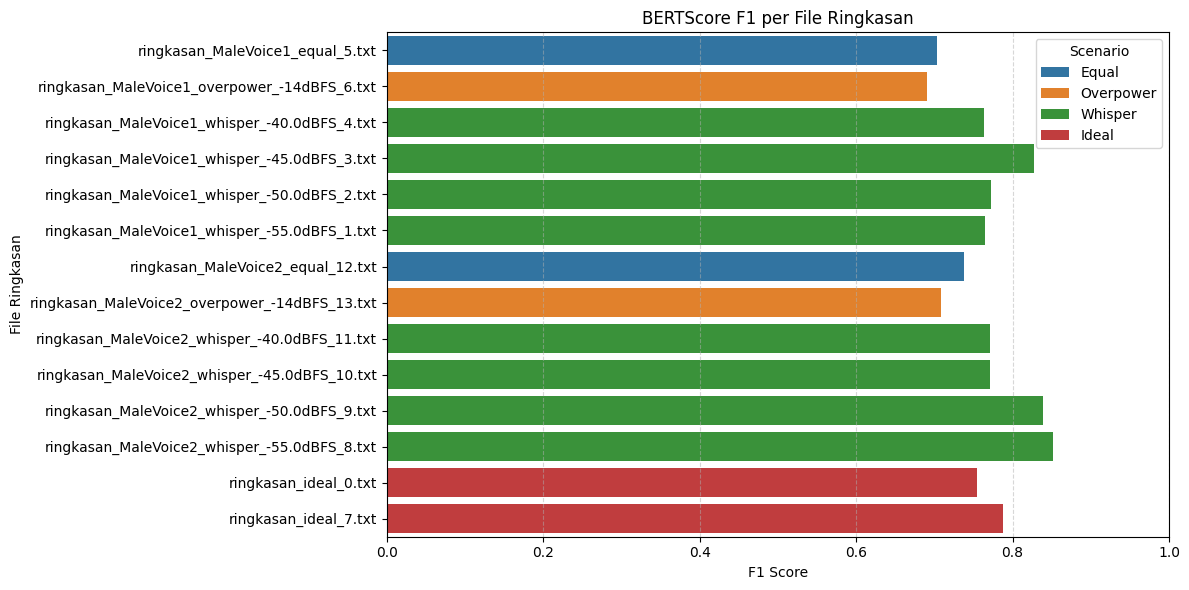

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="f1", y="filename", hue="Scenario", dodge=False)
plt.title("BERTScore F1 per File Ringkasan")
plt.xlabel("F1 Score")
plt.ylabel("File Ringkasan")
plt.xlim(0, 1)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title="Scenario")
plt.show()

In [ ]:
grouped_stats = df.groupby("Scenario")[["precision", "recall", "f1"]].mean().sort_values("f1", ascending=False)
grouped_stats.reset_index(inplace=True)

C:\Users\dephm\AppData\Local\Temp\ipykernel_24648\218299587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_stats, x="f1", y="Scenario", palette="viridis")


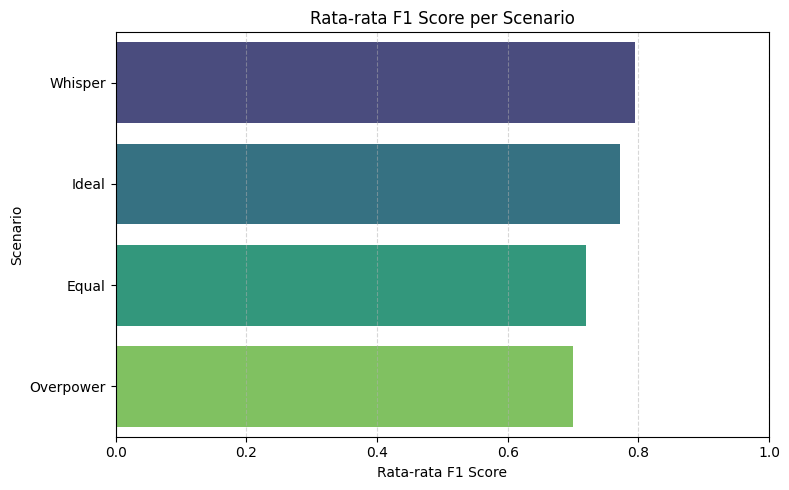

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_stats, x="f1", y="Scenario", palette="viridis")
plt.title("Rata-rata F1 Score per Scenario")
plt.xlabel("Rata-rata F1 Score")
plt.ylabel("Scenario")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
def extract_actor(filename):
    name = filename.lower()
    if "male1" in name:
        return "Male1"
    elif "male2" in name:
        return "Male2"
    else:
        return "Unknown"

df["Actor"] = df["filename"].apply(extract_actor)

C:\Users\dephm\AppData\Local\Temp\ipykernel_24648\3430830161.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Scenario")


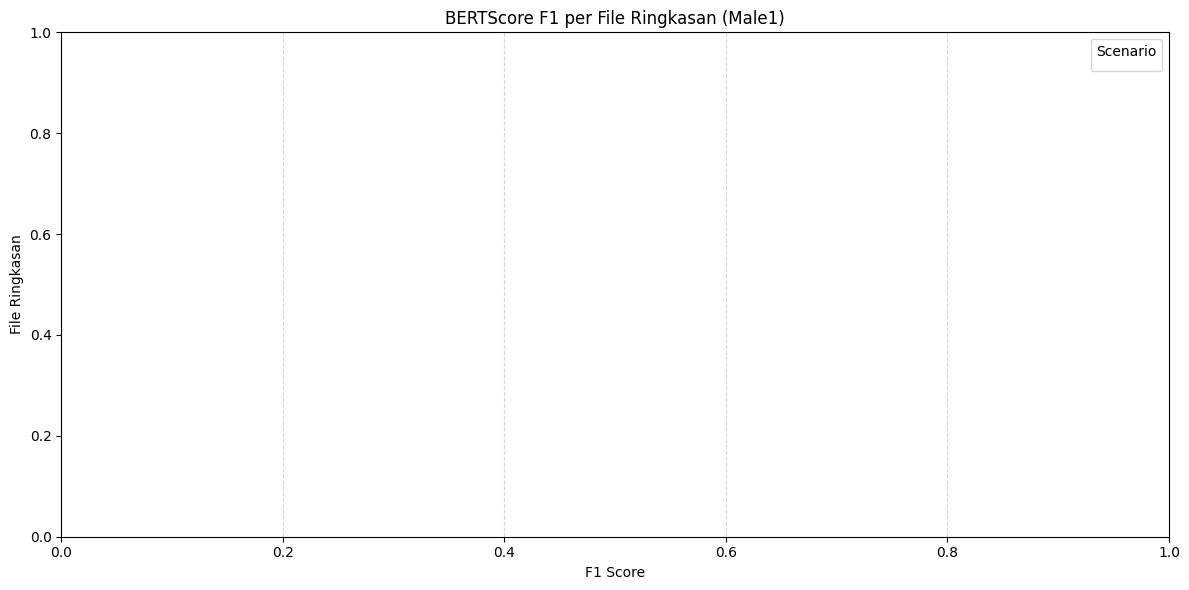

C:\Users\dephm\AppData\Local\Temp\ipykernel_24648\3430830161.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Scenario")


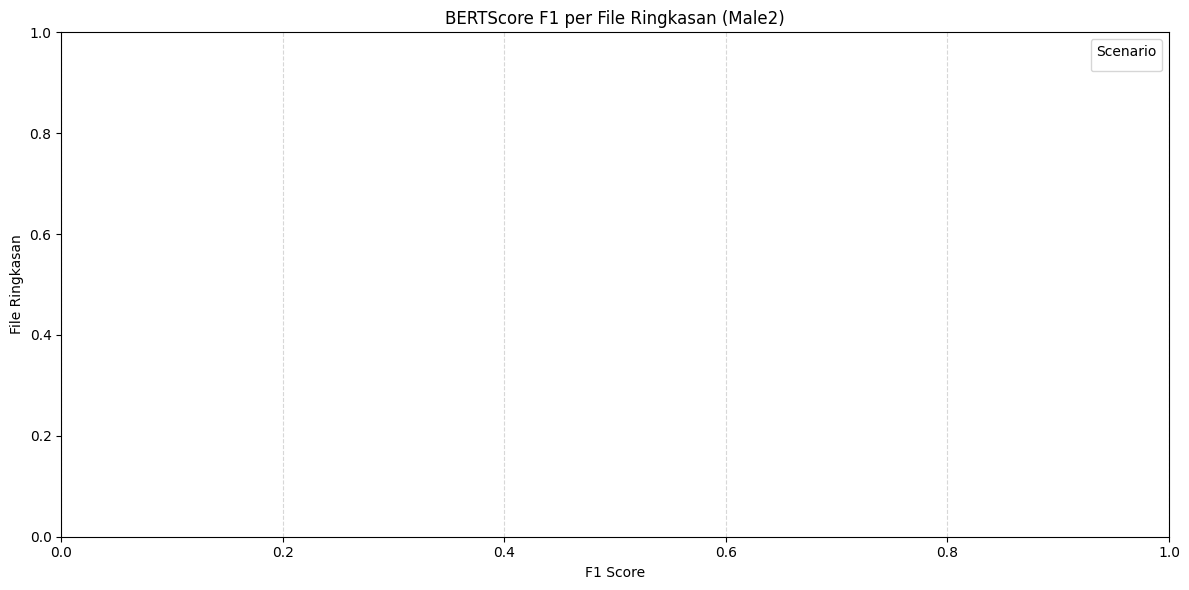

In [ ]:
# Barplot per Actor
for actor in ["Male1", "Male2"]:
    plt.figure(figsize=(12, 6))
    df_actor = df[df["Actor"] == actor]
    sns.barplot(data=df_actor, x="f1", y="filename", hue="Scenario", dodge=False)
    plt.title(f"BERTScore F1 per File Ringkasan ({actor})")
    plt.xlabel("F1 Score")
    plt.ylabel("File Ringkasan")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.legend(title="Scenario")
    plt.tight_layout()
    plt.show()

C:\Users\dephm\AppData\Local\Temp\ipykernel_24648\3430830161.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Scenario")


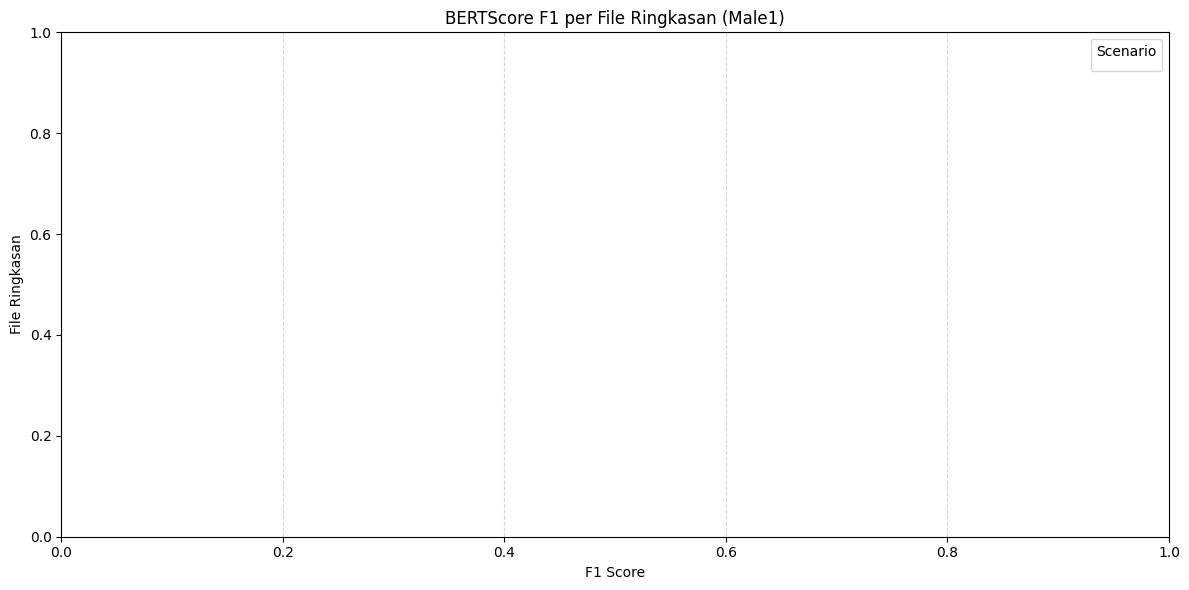

C:\Users\dephm\AppData\Local\Temp\ipykernel_24648\3430830161.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Scenario")


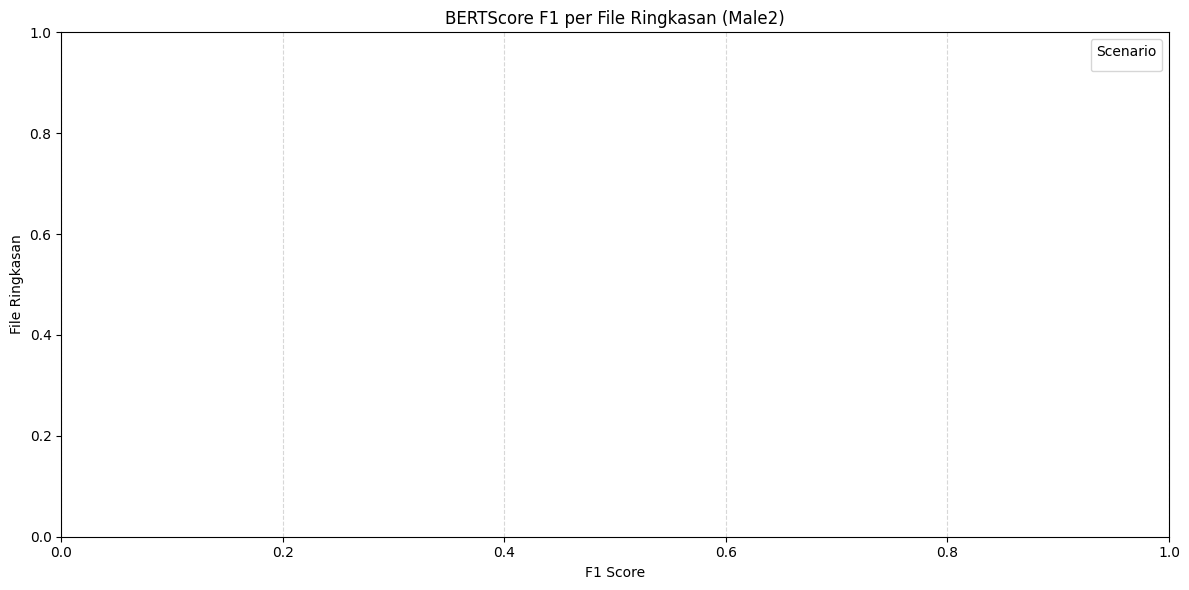

In [ ]:
# Barplot per Actor
for actor in ["Male1", "Male2"]:
    plt.figure(figsize=(12, 6))
    df_actor = df[df["Actor"] == actor]
    sns.barplot(data=df_actor, x="f1", y="filename", hue="Scenario", dodge=False)
    plt.title(f"BERTScore F1 per File Ringkasan ({actor})")
    plt.xlabel("F1 Score")
    plt.ylabel("File Ringkasan")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.legend(title="Scenario")
    plt.tight_layout()
    plt.show()

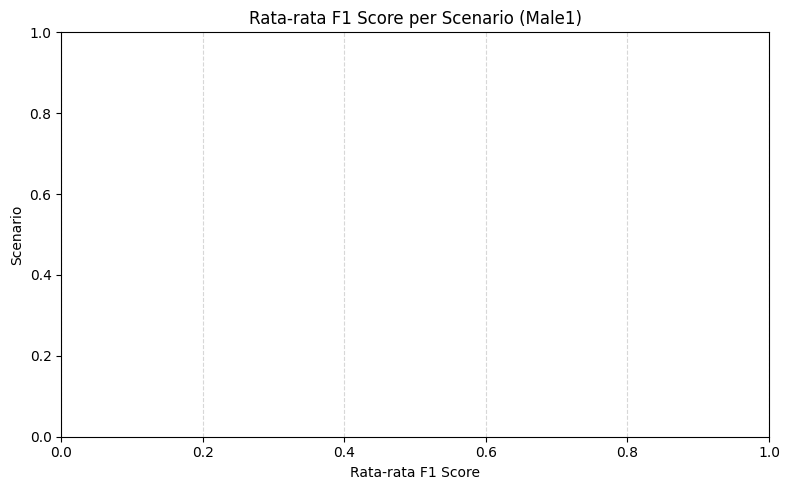

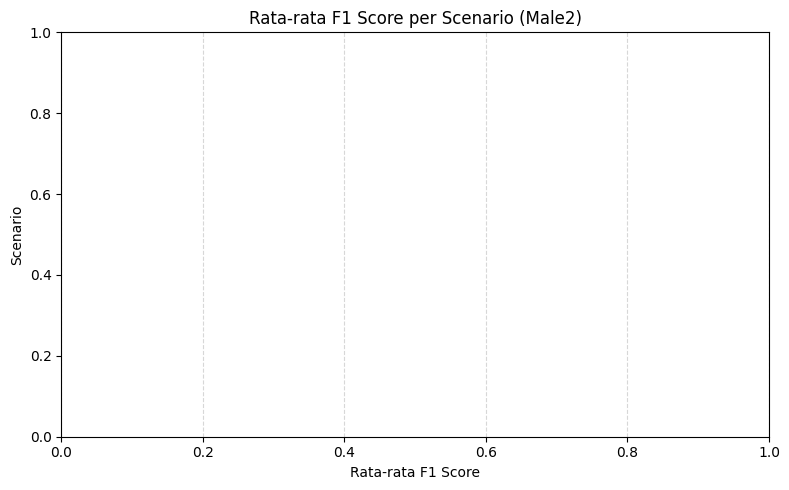

In [ ]:
# Hitung rata-rata untuk tiap Actor dan Scenario
grouped_by_actor = df.groupby(["Actor", "Scenario"])[["precision", "recall", "f1"]].mean().reset_index()

# Plot per actor
for actor in ["Male1", "Male2"]:
    plt.figure(figsize=(8, 5))
    data = grouped_by_actor[grouped_by_actor["Actor"] == actor]
    sns.barplot(data=data, x="f1", y="Scenario", palette="magma")
    plt.title(f"Rata-rata F1 Score per Scenario ({actor})")
    plt.xlabel("Rata-rata F1 Score")
    plt.ylabel("Scenario")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
print("\n== Rata-rata Precision, Recall, dan F1 Score per Scenario per Actor ==\n")
print(grouped_by_actor.pivot(index="Scenario", columns="Actor", values="f1").round(4))


== Rata-rata Precision, Recall, dan F1 Score per Scenario per Actor ==

Actor      Unknown
Scenario          
Equal       0.7204
Ideal       0.7715
Overpower   0.6997
Whisper     0.7950


In [ ]:
def extract_speaker(filename):
    name = filename.lower()
    if "ideal_0" in name or "malevoice1" in name or "male1" in name:
        return "Speaker A"
    else:
        return "Speaker B"

df["Speaker"] = df["filename"].apply(extract_speaker)

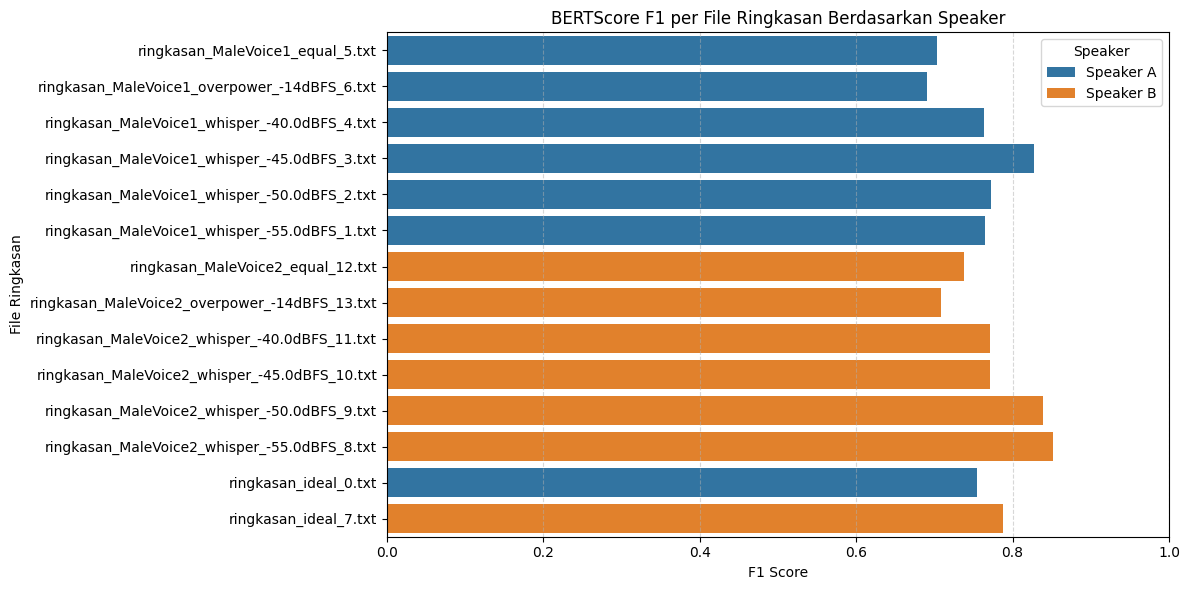

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="f1", y="filename", hue="Speaker", dodge=False)
plt.title("BERTScore F1 per File Ringkasan Berdasarkan Speaker")
plt.xlabel("F1 Score")
plt.ylabel("File Ringkasan")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Speaker")
plt.show()

C:\Users\dephm\AppData\Local\Temp\ipykernel_24648\48608062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="f1", y="Scenario", palette="coolwarm")


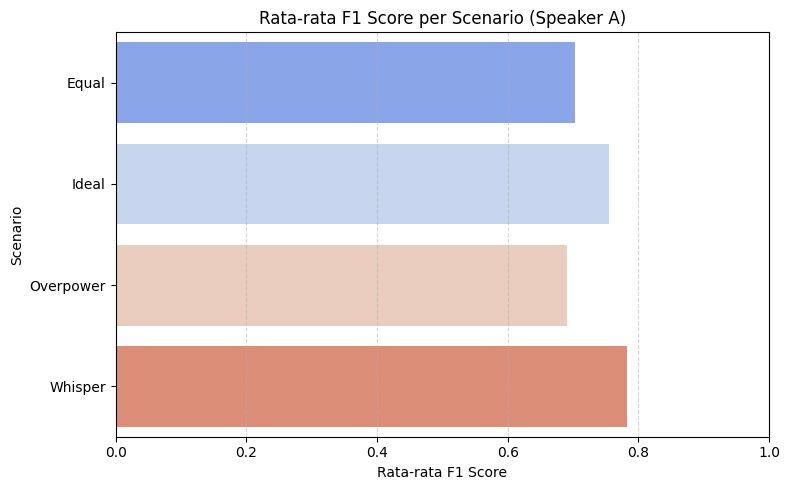

C:\Users\dephm\AppData\Local\Temp\ipykernel_24648\48608062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="f1", y="Scenario", palette="coolwarm")


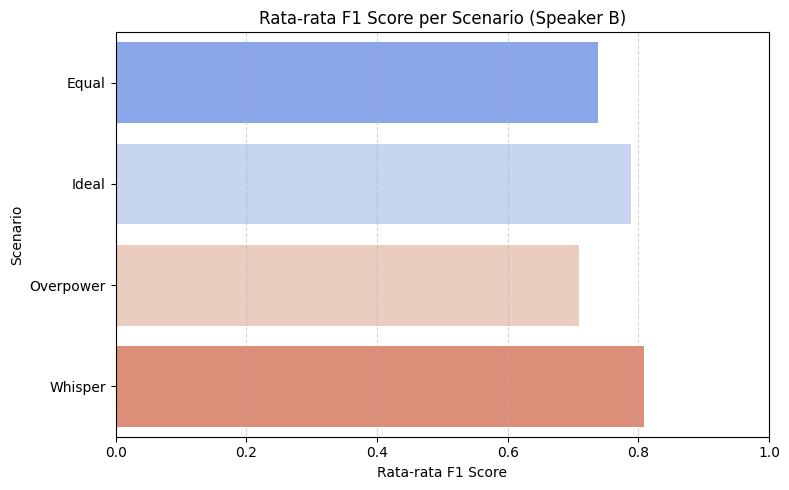

In [ ]:
grouped_by_speaker = df.groupby(["Speaker", "Scenario"])[["precision", "recall", "f1"]].mean().reset_index()

for speaker in ["Speaker A", "Speaker B"]:
    plt.figure(figsize=(8, 5))
    data = grouped_by_speaker[grouped_by_speaker["Speaker"] == speaker]
    sns.barplot(data=data, x="f1", y="Scenario", palette="coolwarm")
    plt.title(f"Rata-rata F1 Score per Scenario ({speaker})")
    plt.xlabel("Rata-rata F1 Score")
    plt.ylabel("Scenario")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
print("\n== Rata-rata Precision, Recall, dan F1 Score per Scenario per Speaker ==\n")
print(grouped_by_speaker.pivot(index="Scenario", columns="Speaker", values="f1").round(4))


== Rata-rata Precision, Recall, dan F1 Score per Scenario per Speaker ==

Speaker    Speaker A  Speaker B
Scenario                       
Equal         0.7028     0.7381
Ideal         0.7548     0.7881
Overpower     0.6907     0.7087
Whisper       0.7821     0.8080


In [ ]:
df["Scenario"] = df["filename"].apply(extract_scenario)
df["Actor"] = df["filename"].apply(extract_actor)
df["Speaker"] = df["filename"].apply(extract_speaker)

# Tambahkan kolom warna (abu gelap untuk ground truth)
def determine_color(filename):
    return "darkgray" if filename == "ringkasan_groundtruth.txt" else "lightgray"
df["Color"] = df["filename"].apply(determine_color)

# Visualisasi khusus per speaker dengan warna
for speaker in ["Speaker A", "Speaker B"]:
    plt.figure(figsize=(12, 6))
    df_speaker = df[df["Speaker"] == speaker]
    bar_colors = df_speaker["Color"]
    
    sns.barplot(
        data=df_speaker,
        x="f1",
        y="filename",
        palette=bar_colors
    )
    
    plt.title(f"BERTScore F1 per File Ringkasan - {speaker} (Highlight Ground Truth)")
    plt.xlabel("F1 Score")
    plt.ylabel("File Ringkasan")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

<h1>FINAL</h1>

In [ ]:
from bert_score import score
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

d:\Tugas Akhir\STT-1\Summarization\summary_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# === Setup Folder ===
ringkasan_folder = "Ringkasan"
ref_path = os.path.join(ringkasan_folder, "ringkasan_groundtruth.txt")

with open(ref_path, "r", encoding="utf-8") as f:
    reference_summary = f.read().strip()

all_summaries = sorted([
    f for f in os.listdir(ringkasan_folder)
    if f.startswith("ringkasan_") and f != "ringkasan_groundtruth.txt"
])

In [11]:
# === BERTScore ===
results = []
for file in all_summaries:
    pred_path = os.path.join(ringkasan_folder, file)
    with open(pred_path, "r", encoding="utf-8") as f:
        prediction = f.read().strip()

    P, R, F1 = score([prediction], [reference_summary], lang="id", rescale_with_baseline=True)

    results.append({
        "filename": file,
        "precision": P.item(),
        "recall": R.item(),
        "f1": F1.item()
    })

df = pd.DataFrame(results)

<h5> === Additional Features Extraction ===</h5>

In [12]:
def extract_scenario(filename):
    name = filename.replace("ringkasan_", "").replace(".txt", "").lower()
    if "ideal" in name:
        return "Ideal"
    elif "whisper" in name:
        return "Whisper"
    elif "overpower" in name:
        return "Overpower"
    elif "equal" in name:
        return "Equal"
    else:
        return "Lainnya"

In [13]:
def extract_actor(filename):
    name = filename.lower()
    if "male1" in name:
        return "Male1"
    elif "male2" in name:
        return "Male2"
    else:
        return "Unknown"

In [14]:
def extract_speaker(filename):
    name = filename.lower()
    if "ideal_0" in name or "malevoice1" in name or "male1" in name:
        return "Speaker A"
    else:
        return "Speaker B"

In [15]:
df["Scenario"] = df["filename"].apply(extract_scenario)
df["Actor"] = df["filename"].apply(extract_actor)
df["Speaker"] = df["filename"].apply(extract_speaker)

In [16]:
def simplify_y_label(row):
    if row["Scenario"] == "Ideal":
        return "Ideal"
    elif row["Scenario"] == "Whisper":
        # Ambil nilai dB spesifik dari nama file
        match = re.search(r'whisper_-([\d\.]+)dbfs', row["filename"].lower())
        if match:
            db = match.group(1)
            return f"Whisper -{int(float(db))}dBFS"
        else:
            return "Whisper"
    elif row["Scenario"] == "Equal":
        return "Equal"
    elif row["Scenario"] == "Overpower":
        return "Overpowered"
    else:
        return "Lainnya"

df["Y_Label_Simplified"] = df.apply(simplify_y_label, axis=1)

In [17]:
kategori_urutan = [
    "Ideal",
    "Whisper -55dBFS", "Whisper -50dBFS", "Whisper -45dBFS", "Whisper -40dBFS",
    "Equal", "Overpowered"
]
df["Y_Label_Simplified"] = pd.Categorical(df["Y_Label_Simplified"], categories=kategori_urutan, ordered=True)

<h5>=== Label Prep ===

In [18]:
df["Color"] = "lightgray"
for speaker in df["Speaker"].unique():
    best_idx = df[df["Speaker"] == speaker]["f1"].idxmax()
    df.loc[best_idx, "Color"] = "gray"

<h5>Visualization

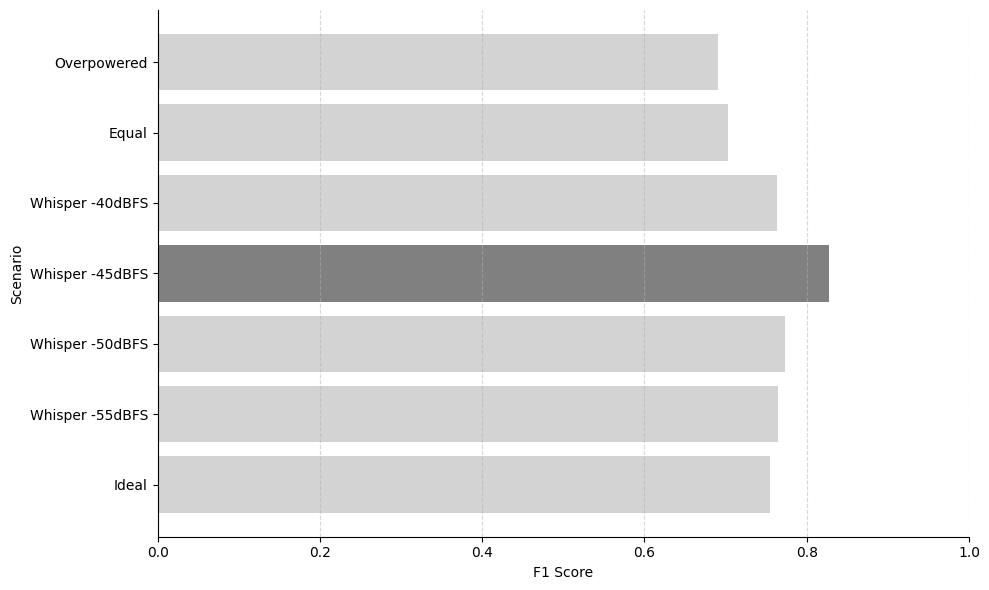

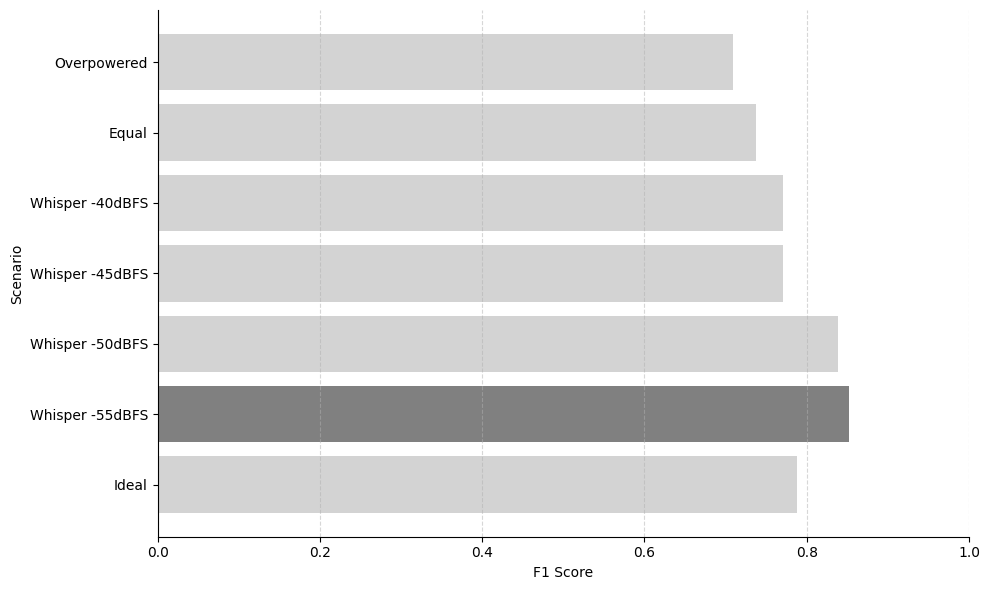

In [19]:
for speaker in ["Speaker A", "Speaker B"]:
    df_speaker = df[df["Speaker"] == speaker].copy()
    df_speaker = df_speaker.sort_values("Y_Label_Simplified")

    plt.figure(figsize=(10, 6))
    plt.barh(
        y=df_speaker["Y_Label_Simplified"],
        width=df_speaker["f1"],
        color=df_speaker["Color"]
    )

    plt.xlabel("F1 Score")
    plt.ylabel("Scenario")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

In [20]:
grouped = df.groupby(["Speaker", "Scenario"])[["precision", "recall", "f1"]].mean().reset_index()
print("\n== Rata-rata Precision, Recall, dan F1 Score per Scenario per Speaker ==\n")
print(grouped.pivot(index="Scenario", columns="Speaker", values="f1").round(4))


== Rata-rata Precision, Recall, dan F1 Score per Scenario per Speaker ==

Speaker    Speaker A  Speaker B
Scenario                       
Equal         0.7028     0.7381
Ideal         0.7548     0.7881
Overpower     0.6907     0.7087
Whisper       0.7821     0.8080


In [21]:
output_csv = os.path.join(ringkasan_folder, "bertscore_evaluation_cleaned.csv")
df.to_csv(output_csv, index=False, encoding="utf-8")
print("\nEvaluasi BERTScore selesai dan disimpan di:", output_csv)


Evaluasi BERTScore selesai dan disimpan di: Ringkasan\bertscore_evaluation_cleaned.csv


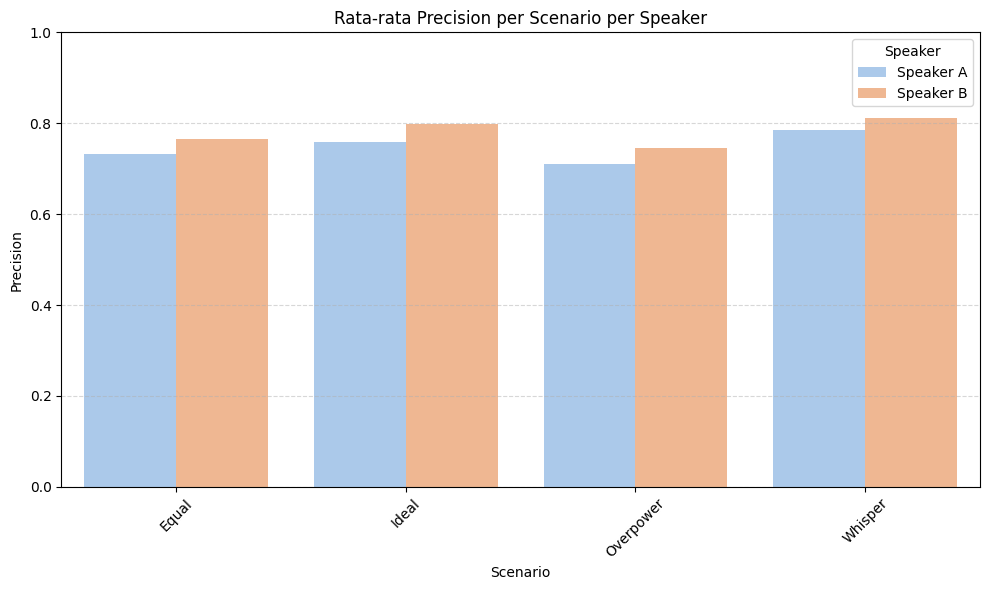

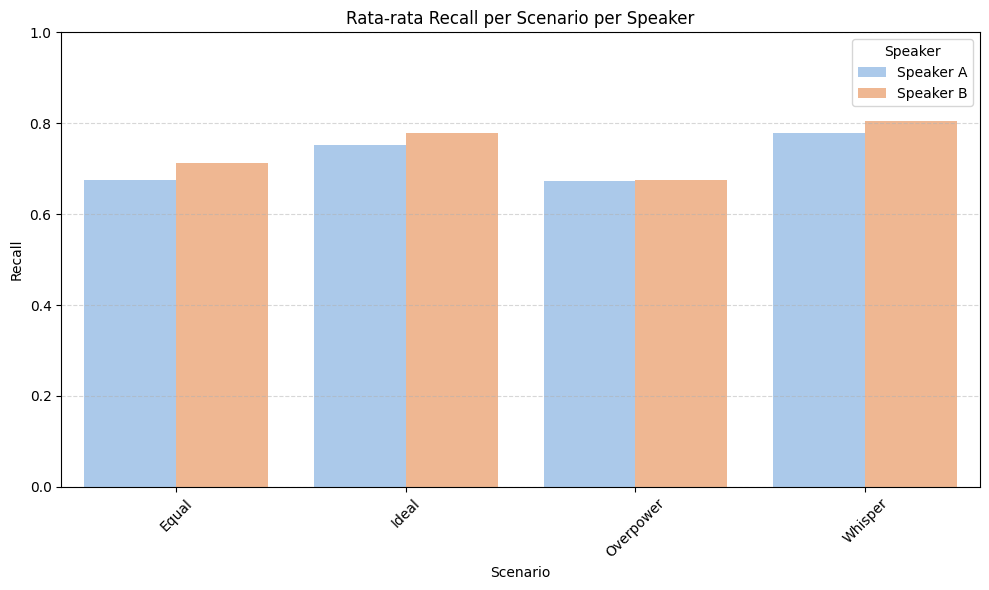

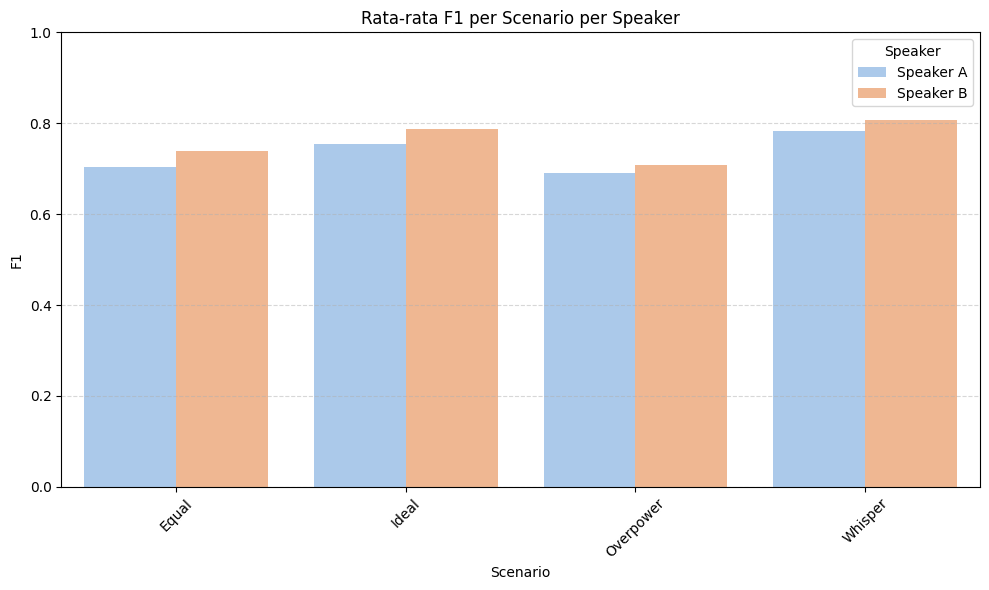

In [22]:
# === Visualisasi Grup: Precision, Recall, F1 per Scenario per Speaker ===
metrics = ["precision", "recall", "f1"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=grouped,
        x="Scenario",
        y=metric,
        hue="Speaker",
        palette="pastel"
    )
    plt.title(f"Rata-rata {metric.capitalize()} per Scenario per Speaker")
    plt.ylabel(metric.capitalize())
    plt.xlabel("Scenario")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title="Speaker")
    plt.show()

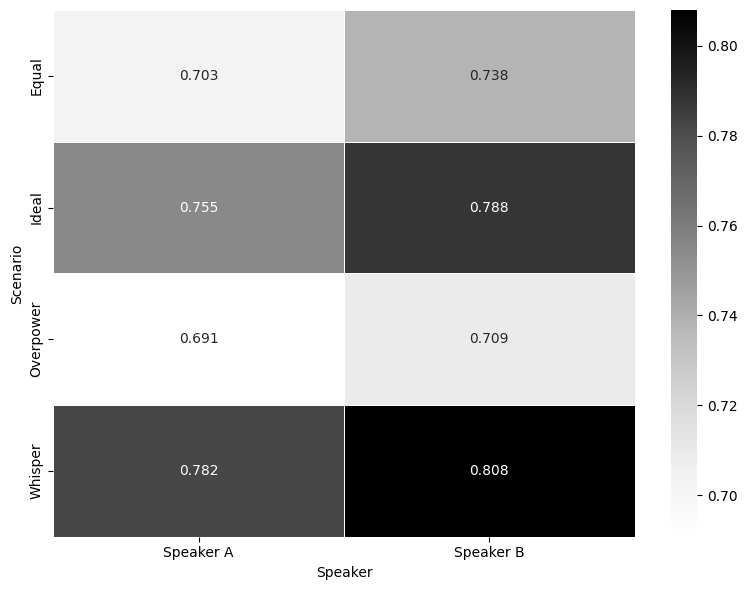

In [ ]:
# Pivot agar sesuai untuk heatmap
pivot_f1 = grouped.pivot(index="Scenario", columns="Speaker", values="f1")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_f1, annot=True, cmap="Greys", fmt=".3f", linewidths=.5, linecolor='white')
plt.title("Heatmap F1 Score per Scenario per Speaker")
plt.xlabel("Speaker")
plt.ylabel("Scenario")
plt.tight_layout()
plt.show()

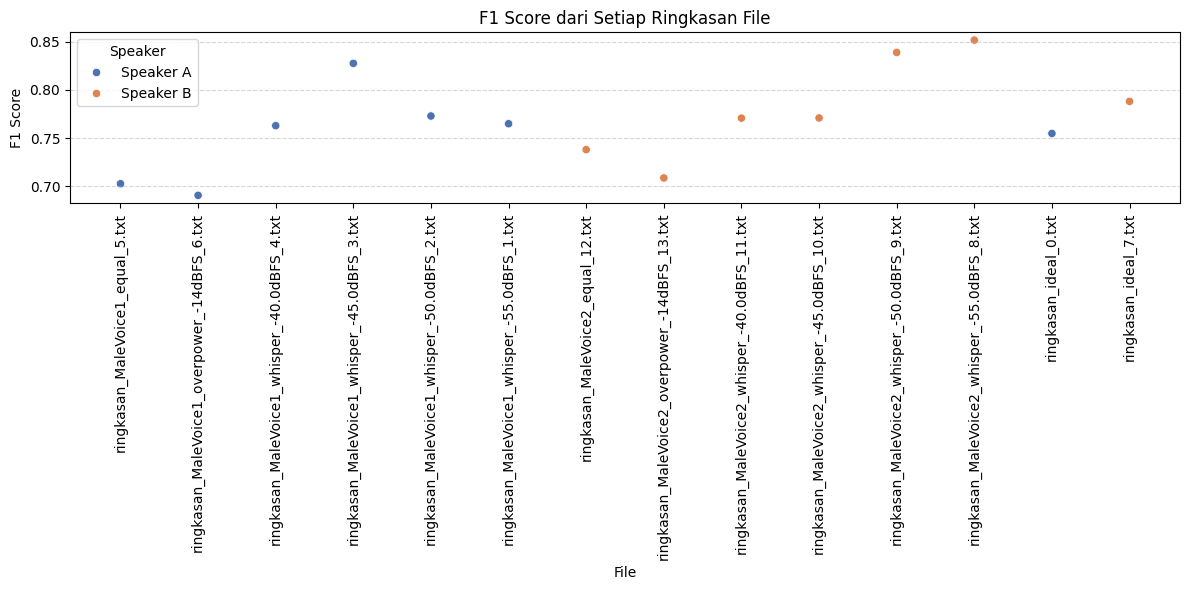

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="filename", y="f1", hue="Speaker", palette="deep")
plt.xticks(rotation=90)
plt.title("F1 Score dari Setiap Ringkasan File")
plt.xlabel("File")
plt.ylabel("F1 Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Speaker")
plt.show()

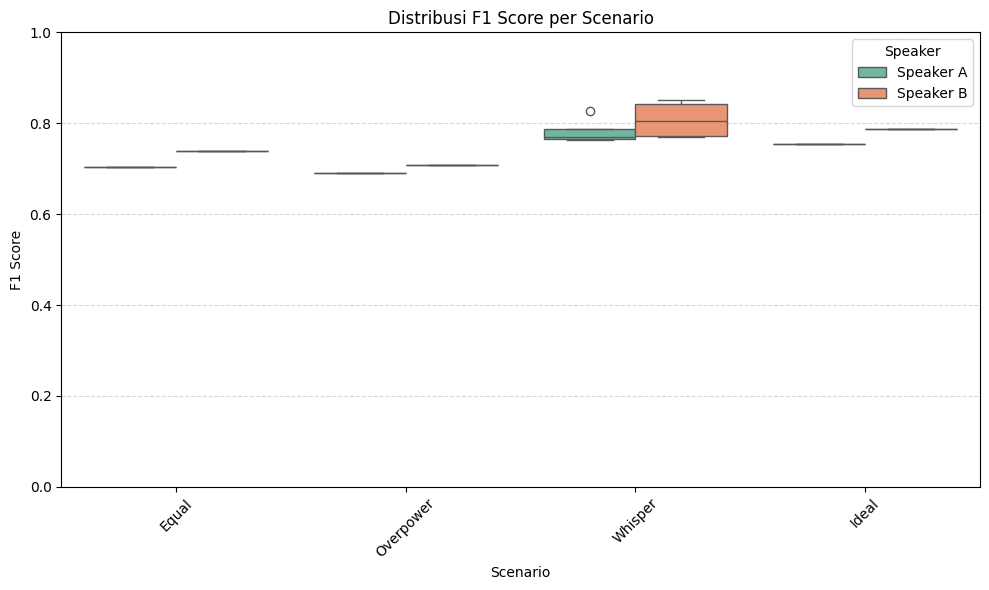

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Scenario", y="f1", hue="Speaker", palette="Set2")
plt.title("Distribusi F1 Score per Scenario")
plt.xlabel("Scenario")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Group by Speaker dan label yang disederhanakan (termasuk Whisper -55dBFS dst)
tabel_rata2 = df.groupby(["Speaker", "Y_Label_Simplified"])[["precision", "recall", "f1"]].mean().round(4).reset_index()

# Buat pivot table agar tiap metric jadi kolom
tabel_precision = tabel_rata2.pivot(index="Y_Label_Simplified", columns="Speaker", values="precision")
tabel_recall = tabel_rata2.pivot(index="Y_Label_Simplified", columns="Speaker", values="recall")
tabel_f1 = tabel_rata2.pivot(index="Y_Label_Simplified", columns="Speaker", values="f1")

# Gabungkan ketiganya jadi satu tabel multi-index
tabel_gabungan = pd.concat(
    {"Precision": tabel_precision, "Recall": tabel_recall, "F1": tabel_f1},
    axis=1
)

# Tampilkan tabel
print("\n=== Tabel Precision, Recall, dan F1 Score per Scenario dan Speaker ===\n")
print(tabel_gabungan)

# Simpan ke CSV
tabel_csv_path = os.path.join(ringkasan_folder, "bertscore_summary_table.csv")
tabel_gabungan.to_csv(tabel_csv_path, encoding="utf-8")
print("\nTabel ringkasan disimpan di:", tabel_csv_path)


=== Tabel Precision, Recall, dan F1 Score per Scenario dan Speaker ===

                   Precision              Recall                  F1          
Speaker            Speaker A Speaker B Speaker A Speaker B Speaker A Speaker B
Y_Label_Simplified                                                            
Ideal                 0.7585    0.7987    0.7512    0.7778    0.7548    0.7881
Whisper -55dBFS       0.7700    0.8521    0.7599    0.8511    0.7649    0.8516
Whisper -50dBFS       0.7762    0.8291    0.7697    0.8487    0.7729    0.8388
Whisper -45dBFS       0.8300    0.7777    0.8250    0.7642    0.8275    0.7709
Whisper -40dBFS       0.7658    0.7828    0.7601    0.7590    0.7629    0.7707
Equal                 0.7324    0.7660    0.6754    0.7121    0.7028    0.7381
Overpowered           0.7092    0.7458    0.6732    0.6752    0.6907    0.7087

Tabel ringkasan disimpan di: Ringkasan\bertscore_summary_table.csv


C:\Users\dephm\AppData\Local\Temp\ipykernel_20836\281054870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabel_rata2 = df.groupby(["Speaker", "Y_Label_Simplified"])[["precision", "recall", "f1"]].mean().round(4).reset_index()
